In [1]:
# %%capture
# git clone https://github.com/DuyMinhLe13/Double-Agent-Tetris
# !pip install pygame
# !git clone https://github.com/DuyMinhLe13/notebook-video-writer
import os
import shutil
shutil.move('E:/Tetris/Double-Agent-Tetris/TetrisBattle', 'E:/Tetris')
# shutil.move('/content/Double-Agent-Tetris/CustomAgent.py', '/content')
# shutil.move('notebook-video-writer/notebook_video_writer', '/content')

'E:/Tetris\\TetrisBattle'

In [4]:
from TetrisBattle.envs.tetris_env import TetrisDoubleEnv, TetrisSingleEnv
# from notebook_video_writer import VideoWriter
# from CustomAgent import Agent

In [5]:
import numpy as np
import random
from copy import deepcopy
random.seed(18)

In [6]:
START_IN_ROW = 4
START_IN_COL = 2

DEPTH_BOARD = 20
WIDTH_BOARD = 10

DEFAULT_GRID = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]


ipieces = [[[0, 0, 1, 0],
            [0, 0, 1, 0],
            [0, 0, 1, 0],
            [0, 0, 1, 0]],
                          [[0, 0, 0, 0],
                           [0, 0, 0, 0],
                           [1, 1, 1, 1],
                           [0, 0, 0, 0]],
                                         [[0, 1, 0, 0],
                                          [0, 1, 0, 0],
                                          [0, 1, 0, 0],
                                          [0, 1, 0, 0]],
                                                        [[0, 0, 0, 0],
                                                         [1, 1, 1, 1],
                                                         [0, 0, 0, 0],
                                                         [0, 0, 0, 0]]]
opieces = [[[0, 0, 0, 0],
            [0, 1, 1, 0],
            [0, 1, 1, 0],
            [0, 0, 0, 0]],
                          [[0, 0, 0, 0],
                           [0, 1, 1, 0],
                           [0, 1, 1, 0],
                           [0, 0, 0, 0]],
                                         [[0, 0, 0, 0],
                                          [0, 1, 1, 0],
                                          [0, 1, 1, 0],
                                          [0, 0, 0, 0]],
                                                        [[0, 0, 0, 0],
                                                         [0, 1, 1, 0],
                                                         [0, 1, 1, 0],
                                                         [0, 0, 0, 0]]]

jpieces = [[[0, 1, 1, 0],
            [0, 0, 1, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 0]],
                          [[0, 0, 0, 0],
                           [0, 1, 1, 1],
                           [0, 1, 0, 0],
                           [0, 0, 0, 0]],
                                         [[0, 0, 1, 0],
                                          [0, 0, 1, 0],
                                          [0, 0, 1, 1],
                                          [0, 0, 0, 0]],
                                                        [[0, 0, 0, 1],
                                                         [0, 1, 1, 1],
                                                         [0, 0, 0, 0],
                                                         [0, 0, 0, 0]]]

lpieces = [[[0, 0, 1, 0],
            [0, 0, 1, 0],
            [0, 1, 1, 0],
            [0, 0, 0, 0]],
                          [[0, 0, 0, 0],
                           [0, 1, 1, 1],
                           [0, 0, 0, 1],
                           [0, 0, 0, 0]],
                                         [[0, 0, 1, 1],
                                          [0, 0, 1, 0],
                                          [0, 0, 1, 0],
                                          [0, 0, 0, 0]],
                                                        [[0, 1, 0, 0],
                                                         [0, 1, 1, 1],
                                                         [0, 0, 0, 0],
                                                         [0, 0, 0, 0]]]
zpieces = [[[0, 1, 0, 0],
            [0, 1, 1, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 0]],
                          [[0, 0, 0, 0],
                           [0, 1, 1, 0],
                           [1, 1, 0, 0],
                           [0, 0, 0, 0]],
                                         [[0, 1, 0, 0],
                                          [0, 1, 1, 0],
                                          [0, 0, 1, 0],
                                          [0, 0, 0, 0]],
                                                        [[0, 0, 1, 1],
                                                         [0, 1, 1, 0],
                                                         [0, 0, 0, 0],
                                                         [0, 0, 0, 0]]]
spieces = [[[0, 0, 1, 0],
            [0, 1, 1, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 0]],
                          [[0, 0, 0, 0],
                           [0, 1, 1, 0],
                           [0, 0, 1, 1],
                           [0, 0, 0, 0]],
                                         [[0, 0, 1, 0],
                                          [0, 1, 1, 0],
                                          [0, 1, 0, 0],
                                          [0, 0, 0, 0]],
                                                        [[1, 1, 0, 0],
                                                         [0, 1, 1, 0],
                                                         [0, 0, 0, 0],
                                                         [0, 0, 0, 0]]]

tpieces = [[[0, 0, 1, 0],
            [0, 1, 1, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 0]],
                          [[0, 0, 0, 0],
                           [1, 1, 1, 0],
                           [0, 1, 0, 0],
                           [0, 0, 0, 0]],
                                         [[0, 0, 0, 0],
                                          [0, 0, 1, 0],
                                          [0, 0, 1, 1],
                                          [0, 0, 1, 0]],
                                                        [[0, 0, 1, 0],
                                                         [0, 1, 1, 1],
                                                         [0, 0, 0, 0],
                                                         [0, 0, 0, 0]]]

NUM_PIECES = np.arange(7)
MAP_NUM_PIECE = {0: ipieces, 1: opieces, 2: jpieces, 3: lpieces, 4: zpieces, 5: spieces, 5: tpieces}



In [7]:
class Tetris():
    def __init__(self, board, index_cur_piece):
        self.board = board
        self.sub_index_block = 0
        # self.index_next_piece = index_next_piece
        self.index_cur_piece = index_cur_piece
        self.cur_piece = MAP_NUM_PIECE[self.index_cur_piece][0]
        # Position default
        self.px = 4
        self.py = 0

        # define action
        self.action_meaning = {
            2: "drop",
            5: "right",
            6: "left"
        }

        # cleared
        self.cleared = 0

        # end game
        self.done = False
        
    
            
            
    def get_ful_pos(self, piece):
        full_pos = []
        for x, row in enumerate(piece):
            for y, cell in enumerate(row):
                if cell == 1:
                    full_pos.append((x, y))
        return full_pos
    
    def check_collision(self, piece, px, py):
            # the top left of piece:
            # px is num of col in board
            # py is num of row in board
            full_pos = self.get_full_pos(piece)
            if len(full_pos) == 0:
                return True
            for pos in full_pos:
                x = pos[0]
                y = pos[1]
                if x + px > WIDTH_BOARD - 1:  # bound right
                    return True

                if x + px < 0:  # bound left
                    return True

                if y + py > DEPTH_BOARD - 1:  # bound bottom
                    return True

                if y + py < 0:
                    continue

                if self.board[x + px][y + py] > 0:
                    return True
            return False
        
    def depth_drop(self, piece, px, py):
        depth = 0
        while True:
            if self.check_collision( piece, px, py + depth) is True:
                break
            depth += 1
        depth -= 1
        return depth
    
    def drop(self):
        depth_falling = self.depth_drop( piece=self.cur_piece, px=self.px, py=self.py)
        if depth_falling == -1:
            self.done = True
            return self.board, self.done
        py += depth_falling
        new_board = deepcopy(self.board)
        full_pos_block = self.get_full_pos(self.cur_piece)
        for pos in full_pos_block:
            x = pos[0]
            y = pos[1]
            new_board[self.px + x][self.py + y] = 1
        self.board = new_board
        self.clear()
        self.new_block()
        return new_board, self.done

    def rotate_right(self):
        self.sub_index_block += 1
        self.sub_index_block %= 4
        self.current_block = MAP_NUM_PIECE[self.index_cur_piece][self.sub_index_block]

    def rotate_left(self):
        self.sub_index_block += 3
        self.sub_index_block %= 4
        self.current_block = MAP_NUM_PIECE[self.index_cur_piece][self.sub_index_block]

    def move(self, action):
        # 5: right  ~ +1
        # 6: left   ~ -1
        # 3: rotate right
        # 4: rotate left
        # 2: drop
        # print(np.transpose(np.array(self.current_block)))
        if action == 2:
            return self.drop()
        if action == 5:
            if not self.check_collision(self.current_block, px=(self.px + 1), py=self.py):
                self.px += 1
        if action == 6:
            if not self.check_collision(self.current_block, px=(self.px - 1), py=self.py):
                self.px -= 1
        if action == 3:
            self.rotate_right()
        if action == 4:
            self.rotate_left()
        return self.board, self.done

    def clear(self):
        clear = 0
        for col in range(DEPTH_BOARD):
            cnt = 0
            for row in range(WIDTH_BOARD):
                if self.board[row][col] == 1:
                    cnt += 1
            if cnt == WIDTH_BOARD:
                clear += 1
                for i in range(WIDTH_BOARD):
                    del self.board[i][col]
                    self.board[i] = [0] + self.board[i]
        self.cleared = clear

    def get_info_from_state(self):
        heights = []
        holes = []
        for row in range(WIDTH_BOARD):
            height_row = 0
            for col in range(DEPTH_BOARD):
                if self.board[row][col] == 1.:
                    height_row = DEPTH_BOARD - col
                    n_hol_in_col = 0
                    for col_hole in range(col + 1, DEPTH_BOARD):
                        if self.board[row][col_hole] == 0:
                            n_hol_in_col += 1
                    holes.append(n_hol_in_col)
                    break
            heights.append(height_row)

        # height sum
        height_sum = sum(heights)
        # diff sum
        diff_sum = 0
        for i in range(1, len(heights)):
            diff_sum += abs(heights[i] - heights[i - 1])

        # height max
        max_height = max(heights)

        # holes sum
        hole_sum = sum(holes)

        # deepest unfilled
        deepest_unfilled = min(heights)

        # blocks count
        blocks = 0
        for row in self.board:
            blocks += np.count_nonzero(np.array(row))
        blocks /= 4

        # col holes
        col_holes = np.count_nonzero(np.array(holes))

        # cleared
        cleared_num = self.cleared

        # pit hole percent
        pit = (WIDTH_BOARD * DEPTH_BOARD - height_sum)
        pit_hole_percent = pit / (pit + hole_sum)

        return [height_sum, diff_sum, max_height, hole_sum, deepest_unfilled,
                blocks, col_holes, cleared_num, pit_hole_percent]
        
    def __get_a_possible_move_list(self, right=0, left=0, rot_right=0, rot_left=0):
        a_possible_move_list = []
        for _ in range(rot_left):
            a_possible_move_list.append(4)
            
        for _ in range(rot_right):
            a_possible_move_list.append(3)
            
        for _ in range(right):
            a_possible_move_list.append(5)
            
        for _ in range(left):
            a_possible_move_list.append(6)
            
        a_possible_move_list.append(2)
        
        return a_possible_move_list
    
    def get_possible_move_lists(self):
        max_left = 4
        max_right = 3
        """extra"""
        newpossible_movelists = []

        if self.cur_piece == 0:
            """ no rotate"""
            max_left = 4
            max_right = 2
            for left in range(0, max_left + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(left=left))
            for right in range(1, max_right + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(right=right))
            """rotate right: 1"""
            max_left = 6
            max_right = 3
            for left in range(0, max_left + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(left=left, rot_right=1))
            for right in range(1, max_right + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(right=right, rot_right=1))    
        elif self.cur_piece == 1:
            max_left = 5
            max_right = 3
            for left in range(0, max_left + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(left=left))
            for right in range(1, max_right + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(right=right))
        elif self.cur_piece == 2 or self.cur_piece == 3 or self.cur_piece == 6:
            """no rotate"""
            max_left = 4
            max_right = 3
            for left in range(0, max_left + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(left=left))
            for right in range(1, max_right + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(right=right))
            """rotate left = 2"""
            max_left = 4
            max_right = 3
            for left in range(0, max_left + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(left=left, rot_left=2))
            for right in range(1, max_right + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(right=right, rot_left=2))
            """ rotate left 1"""
            max_left = 4
            max_right = 4
            for left in range(0, max_left + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(left=left, rot_left=1))
            for right in range(1, max_right + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(right=right, rot_left=1))
            """rotate right"""
            max_left = 5
            max_right = 3
            for left in range(0, max_left + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(left=left, rot_right=1))
            for right in range(1, max_right + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(right=right, rot_right=1))
        elif self.cur_piece == 4 or self.cur_piece == 5:
            """no rotate"""
            max_left = 4
            max_right = 3
            for left in range(0, max_left + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(left=left))
            for right in range(1, max_right + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(right=right))
            """rotate_right"""
            max_left = 5
            max_right = 3
            for left in range(0, max_left + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(left=left, rot_right=1))
            for right in range(1, max_right + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(right=right, rot_right=1))
            """rotate left"""
            max_left = 4
            max_right = 4
            for left in range(0, max_left + 1):
                newpossible_movelists.append( self.__get_a_possible_move_list(left=left, rot_left=1))
            for right in range(1, max_right + 1):
                newpossible_movelists.append(self.__get_a_possible_move_list(right=right, rot_left=1))
                
        return newpossible_movelists
    
    def list_possible_new_env(self):
        list_pos_new_env = []
        pos_move_lists = self.get_possible_move_lists()
        for move_list in pos_move_lists:
            new_tetris = Tetris(board=self.board, index_cur_piece=self.index_cur_piece)
            
            for action in move_list:
                new_tetris.move(action=action)
            
            list_pos_new_env.append(new_tetris)  
            
        return list_pos_new_env
    
    def get_next_info_list(self):
        list_infos = []
        for env in self.list_possible_new_env():
            list_infos.append(env.get_info_from_state)
            
        return list_infos
                




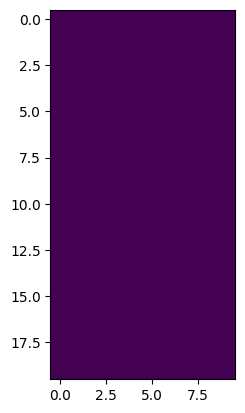

In [34]:
import matplotlib.pyplot as plt
plt.imshow(board)

In [24]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5, 6, 7]])  # Mảng có chiều (1, 7)
arr_reduced = np.squeeze(arr)  # Giảm chiều thành (7,)
max = np.argmax(arr_reduced)
max.dtype


dtype('int64')

In [54]:
def get_board_piece(state):
    
    state = np.array(state)
    board = np.squeeze(state[:, :10, :])
    index_cur_next_piece = np.squeeze(state[:6, 10:17, :])
    #preprocessing
    for row in range(20):
        for col in range(10):
            if board[row][col] == np.float32(0.7) or board[row][col] == np.float32(0.3):
                board[row][col] = float(0)
    index_cur_piece = np.argmax(index_cur_next_piece )
    

    return np.transpose(board), index_cur_piece

In [7]:
class Agent:
    def __init__(self, id):
        self.id = id
    
    def choose_action(self, obs):
        return random.randint(0, 7)
    

In [ ]:
import time
env = TetrisSingleEnv()
time1 = time.time()
for i in range(100):
    env.render(mode='rgb_array')
time2 = time.time()
time2 - time1

0.728797435760498

In [58]:
env = TetrisSingleEnv()
done = False
state = env.reset()

agent = Agent(0)
i = 0

 
while not done:
    board, cur = get_board_piece(state=state)
    print(cur)  


    # real_env = Tetris(board,cur)



    action = agent.choose_action(state)

    state, reward, done, _ = env.step(action)

    i += 1

print(f"abc {i}")



8
8
8
8
8
8
8
11
11
11
11
11
7
7
4
4
4
4
4
4
4
4
4
4
4
4
4
4
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
abc 77


In [ ]:
env = TetrisSingleEnv()
done = False
state = env.reset()
agent = Agent(0)
with VideoWriter(fps=50) as vw:
  while not done:
      vw.add(env.render(mode='rgb_array'))
      action = agent.choose_action(state)
      state, reward, done, _ = env.step(action)

  vw.add(env.render(mode='rgb_array'))

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



In [ ]:
env = TetrisDoubleEnv()
done = False
state = env.reset()
agent_list = [Agent(0), Agent(1)]

with VideoWriter(fps=50) as vw:
  while not done:
      vw.add(env.render(mode='rgb_array'))
      action = agent_list[env.game_interface.getCurrentPlayerID()].choose_action(state)
      state, reward, done, _ = env.step(action)
      env.take_turns()

  vw.add(env.render(mode='rgb_array'))

1
1
